# Basic Statistics in Python

Dataset from Kaggle : **"Aviation Accident Database & Synopses"** by *Kheirallah Samaha*  
Source: kaggle.com/khsamaha/aviation-accident-database-synopses/data (requires login)

---

### Essential Libraries

Let us begin by importing the essential Python Libraries.

> NumPy : Library for Numeric Computations in Python  
> Pandas : Library for Data Acquisition and Preparation  
> Matplotlib : Low-level library for Data Visualization  
> Seaborn : Higher-level library for Data Visualization 

In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

plt.rcParams["axes.grid"] = False # Removes default white gridlines from the plot:


---

### Import the Dataset

The dataset is in CSV format; hence we use the `read_csv` function from Pandas.  
Immediately after importing, take a quick look at the data using the `head` function.

In [2]:
aviationData = pd.read_csv('AviationData.csv', encoding = 'ISO-8859-1')
aviationData.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.Flight,Air.Carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.Phase.of.Flight,Report.Status,Publication.Date
0,20200102X82407,Accident,WPR20CA055,2019-12-31,"Elk, CA",United States,39.128611,-123.715833,LLR,Little River,...,Personal,NaN,NaN,NaN,NaN,1.0,VMC,TAKEOFF,Factual,13/01/2020
1,20191231X83852,Accident,CEN20FA049,2019-12-31,"OLATHE, KS",United States,38.846111,-94.736111,OJC,Johnson County Executive,...,Personal,NaN,2.0,NaN,NaN,NaN,VMC,TAKEOFF,Preliminary,08/01/2020
2,20200102X54844,Accident,ANC20CA011,2019-12-31,"Fairbanks, AK",United States,64.666945,-148.133334,NaN,NaN,...,Personal,NaN,NaN,NaN,NaN,2.0,NaN,NaN,Preliminary,02/01/2020
3,20191230X91852,Accident,CEN20CA048,2019-12-30,"GRANBURY, TX",United States,32.365556,-97.645000,NaN,NaN,...,Personal,NaN,NaN,NaN,NaN,1.0,NaN,NaN,Preliminary,31/12/2019
4,20191228X62945,NaN,WPR20CA053,2019-12-28,"Missoula, MT",United States,NaN,NaN,MSO,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Preliminary,03/01/2020


Check the vital statistics of the dataset using the `type` and `shape` attributes.

In [3]:
print("Data type : ", type(aviationData))
print("Data dims : ", aviationData.shape)
print(aviationData.dtypes)

Data type :  <class 'pandas.core.frame.DataFrame'>
Data dims :  (84262, 31)
Event.Id                   object
Investigation.Type         object
Accident.Number            object
Event.Date                 object
Location                   object
Country                    object
Latitude                  float64
Longitude                 float64
Airport.Code               object
Airport.Name               object
Injury.Severity            object
Aircraft.Damage            object
Aircraft.Category          object
Registration.Number        object
Make                       object
Model                      object
Amateur.Built              object
Number.of.Engines         float64
Engine.Type                object
FAR.Description            object
Schedule                   object
Purpose.of.Flight          object
Air.Carrier                object
Total.Fatal.Injuries      float64
Total.Serious.Injuries    float64
Total.Minor.Injuries      float64
Total.Uninjured           float64
Weathe

---

### Multi-Variate Statistics


Next, we will analyze some variables from the dataset, **Total.Fatal.Injuries**, **Total.Serious.Injuries**, **Total.Minor.Injuries**, **Total.Uninjured** (numeric) VS **Purpose.of.Flight**, **Weather.Condition**, **Broad.Phase.of.Flight**, **Engine.Type** and **Number.of.Engines** (categorical).  
Extract the variables and their associated data as a Pandas `DataFrame`.

In [4]:
# Extract the numeric data variables
aviationData["Total.Fatal.Injuries"].fillna(value = 3, inplace = True)
aviationData["Total.Serious.Injuries"].fillna(value = 3, inplace = True)
aviationData["Total.Minor.Injuries"].fillna(value = 3, inplace = True)
aviationData["Total.Uninjured"].fillna(value = 3, inplace = True)

numDF = pd.DataFrame(aviationData[["Total.Fatal.Injuries", "Total.Serious.Injuries","Total.Minor.Injuries" ,"Total.Uninjured"]])



# Summary Statistics for all Variables
numDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84262 entries, 0 to 84261
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Total.Fatal.Injuries    84262 non-null  float64
 1   Total.Serious.Injuries  84262 non-null  float64
 2   Total.Minor.Injuries    84262 non-null  float64
 3   Total.Uninjured         84262 non-null  float64
dtypes: float64(4)
memory usage: 2.6 MB


C:\Users\Benjamin Tan\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\Benjamin Tan\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\Benjamin Tan\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated

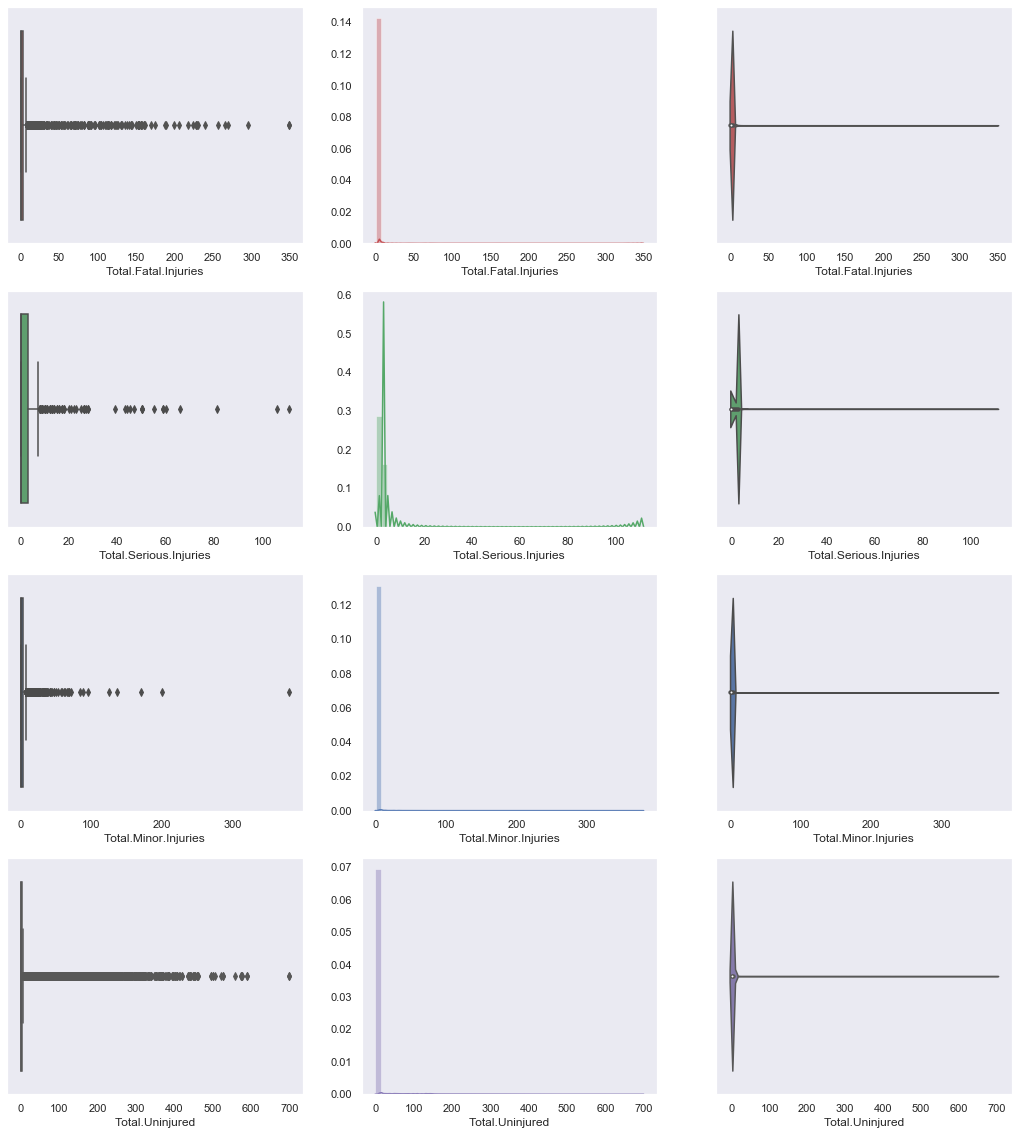

In [5]:
# Draw the distributions of all variables
f, axes = plt.subplots(4, 3, figsize=(18, 20))
colors = ["r", "g", "b", "m"]

count = 0
for var in numDF:
    sb.boxplot(numDF[var], orient = "h", color = colors[count], ax = axes[count,0])
    sb.distplot(numDF[var], color = colors[count], ax = axes[count,1])
    sb.violinplot(numDF[var], color = colors[count], ax = axes[count,2])
    count += 1

In [6]:
# get the cat data which have total fatal injuries > 0 and total serious injuries >=5
aviationData =aviationData[(aviationData['Total.Fatal.Injuries'] > 0) & (aviationData['Total.Serious.Injuries'] >= 5)]
aviaCatData = pd.DataFrame(aviationData[['Engine.Type', 'Weather.Condition', 'Broad.Phase.of.Flight',"Purpose.of.Flight", "Number.of.Engines"]])
aviaCatData

,Engine.Type,Weather.Condition,Broad.Phase.of.Flight,Purpose.of.Flight,Number.of.Engines
69,NaN,NaN,APPROACH,NaN,NaN
243,Reciprocating,VMC,LANDING,Other Work Use,4.0
584,Turbo Prop,NaN,CRUISE,NaN,1.0
1024,Turbo Prop,VMC,MANEUVERING,NaN,1.0
1025,Reciprocating,VMC,MANEUVERING,NaN,1.0
...,...,...,...,...,...
75167,Turbo Prop,VMC,APPROACH,Unknown,2.0
81595,Reciprocating,VMC,CRUISE,Unknown,1.0
82383,Turbo Fan,VMC,TAKEOFF,Unknown,3.0
83883,Turbo Prop,VMC,CRUISE,Unknown,2.0


In [7]:
aviaCatData['Purpose.of.Flight'] = aviaCatData['Purpose.of.Flight'].astype('category')
aviaCatData['Weather.Condition'] = aviaCatData['Weather.Condition'].astype('category')
aviaCatData['Broad.Phase.of.Flight'] = aviaCatData['Broad.Phase.of.Flight'].astype('category')
aviaCatData['Engine.Type'] = aviaCatData['Engine.Type'].astype('category')
aviaCatData["Number.of.Engines"] = aviaCatData["Number.of.Engines"].astype('category')

In [8]:
aviaCatData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 154 entries, 69 to 84178
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Engine.Type            99 non-null     category
 1   Weather.Condition      119 non-null    category
 2   Broad.Phase.of.Flight  79 non-null     category
 3   Purpose.of.Flight      82 non-null     category
 4   Number.of.Engines      81 non-null     category
dtypes: category(5)
memory usage: 3.3 KB


In [9]:
aviaCatData.describe()

,Engine.Type,Weather.Condition,Broad.Phase.of.Flight,Purpose.of.Flight,Number.of.Engines
count,99,119,79,82,81.0
unique,6,3,12,12,5.0
top,Turbo Fan,VMC,TAKEOFF,Unknown,2.0
freq,25,78,26,49,43.0


From here we plot the number of accidents vs **Purpose.of.Flight**, **Weather.Condition**, **Broad.Phase.of.Flight**, **Engine.Type** and **Number.of.Engines** (categorical).

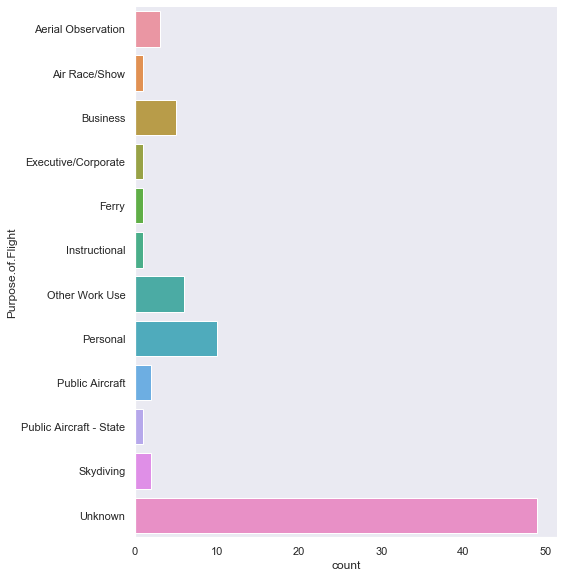

In [10]:
sb.catplot(y = 'Purpose.of.Flight', data = aviaCatData, kind = "count", height = 8)

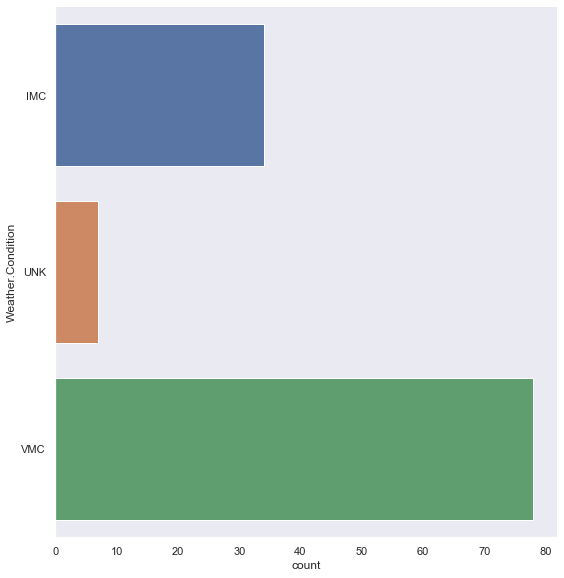

In [11]:
sb.catplot(y = 'Weather.Condition', data = aviaCatData, kind = "count", height = 8)

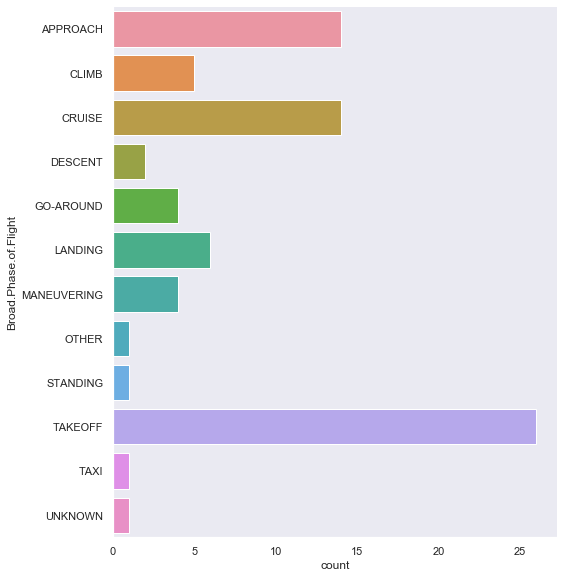

In [12]:
sb.catplot(y = 'Broad.Phase.of.Flight', data = aviaCatData, kind = "count", height = 8)

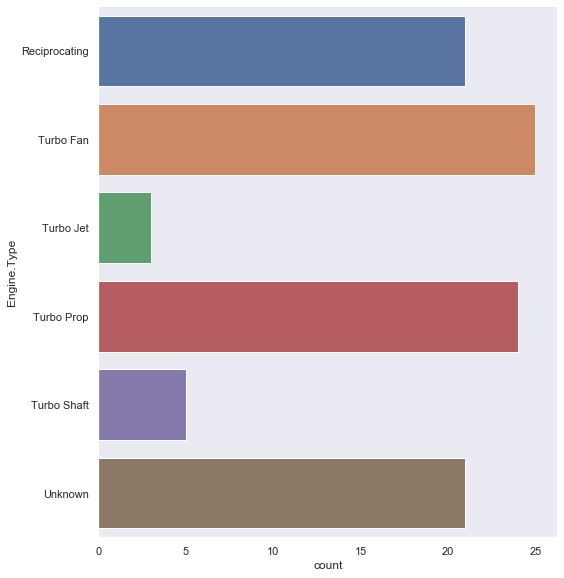

In [13]:
sb.catplot(y = 'Engine.Type', data = aviaCatData, kind = "count", height = 8)

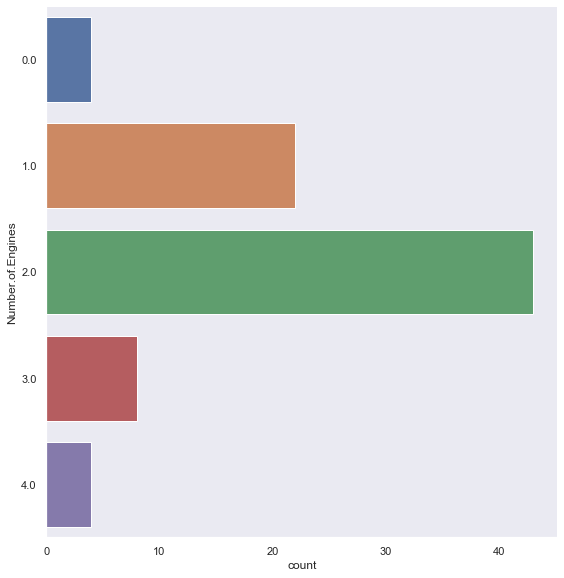

In [14]:
sb.catplot(y = 'Number.of.Engines', data = aviaCatData, kind = "count", height = 8)

### Check the effect of the Variables on 'Total.Fatal.Injuries' and 'Total.Serious.Injuries'

Create a joint DataFrame by concatenating `Total.Fatal.Injuries` to `aviaCatData`.
Create a joint DataFrame by concatenating `Total.Serious.Injuries` to `aviaCatData`.

In [18]:
totalFatal = pd.DataFrame(aviationData['Total.Fatal.Injuries'][aviationData['Total.Fatal.Injuries']>0])
aviaCatFatal = pd.concat([aviaCatData, totalFatal.reindex(index=aviaCatData.index)], sort = False, axis = 1)
aviaCatFatal.head()

,Engine.Type,Weather.Condition,Broad.Phase.of.Flight,Purpose.of.Flight,Number.of.Engines,Total.Fatal.Injuries
69,NaN,NaN,APPROACH,NaN,NaN,3.0
243,Reciprocating,VMC,LANDING,Other Work Use,4.0,7.0
584,Turbo Prop,NaN,CRUISE,NaN,1.0,4.0
1024,Turbo Prop,VMC,MANEUVERING,NaN,1.0,6.0
1025,Reciprocating,VMC,MANEUVERING,NaN,1.0,6.0


From here, we will plot **Total.Fatal.Injuries** (numeric) against **Purpose.of.Flight**, **Weather.Condition**, **Broad.Phase.of.Flight**, **Engine.Type** and **Number.of.Engines** (categorical).

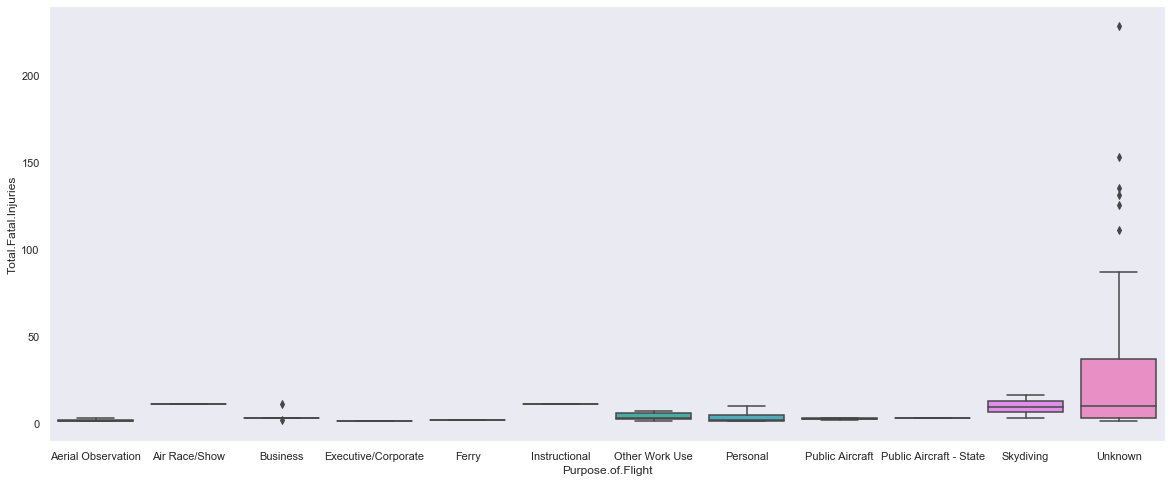

In [24]:
f, axes = plt.subplots(1, 1, figsize=(20, 8))
sb.boxplot(x = 'Purpose.of.Flight', y = 'Total.Fatal.Injuries', data = aviaCatFatal)

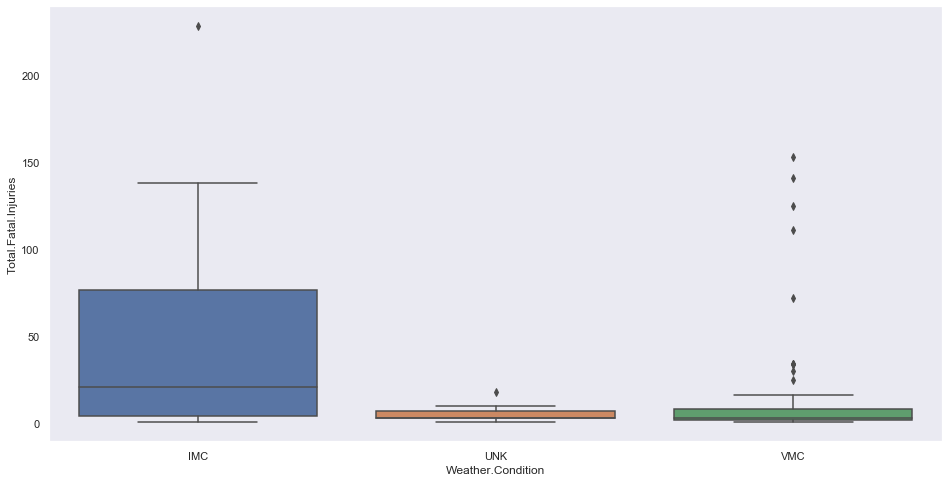

In [20]:
f, axes = plt.subplots(1, 1, figsize=(16, 8))
sb.boxplot(x = 'Weather.Condition', y = 'Total.Fatal.Injuries', data = aviaCatFatal)

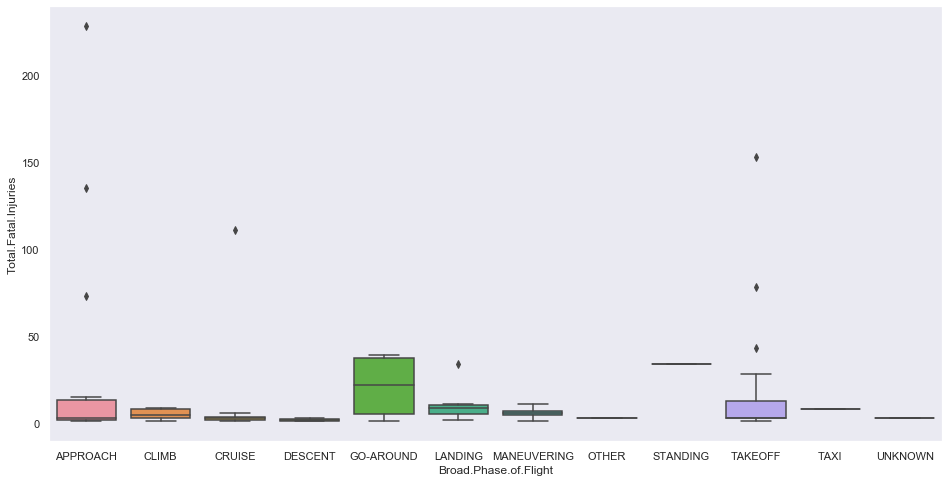

In [21]:
f, axes = plt.subplots(1, 1, figsize=(16, 8))
sb.boxplot(x = 'Broad.Phase.of.Flight', y = 'Total.Fatal.Injuries', data = aviaCatFatal)

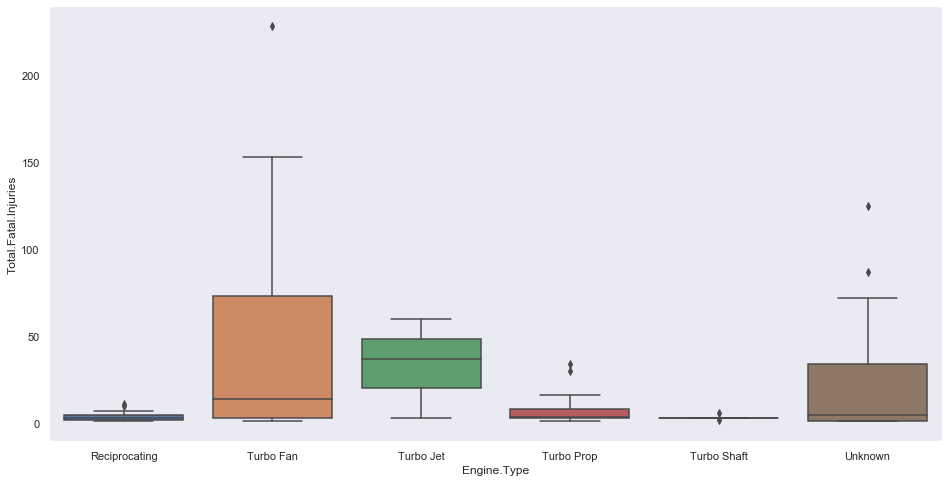

In [22]:
f, axes = plt.subplots(1, 1, figsize=(16, 8))
sb.boxplot(x = 'Engine.Type', y = 'Total.Fatal.Injuries', data = aviaCatFatal)

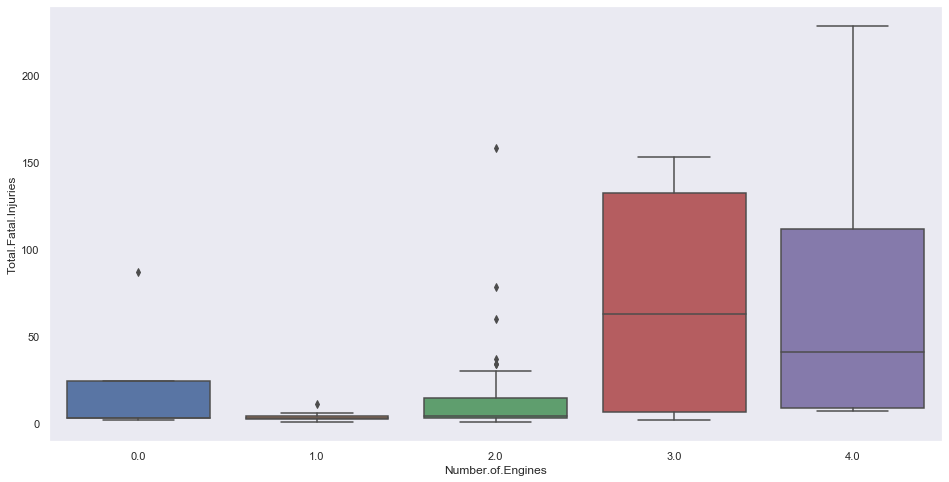

In [23]:
f, axes = plt.subplots(1, 1, figsize=(16, 8))
sb.boxplot(x = 'Number.of.Engines', y = 'Total.Fatal.Injuries', data = aviaCatFatal)